In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib

In [2]:
df = pd.read_csv("weatherAUS.csv")
pd.set_option("display.max_columns", None)
df.head(20)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [3]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 16
Discrete feature Count 2
Continuous feature Count 14
Categorical feature Count 7


In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
#is there null values
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [7]:
print(numerical_feature)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [8]:
def randomsampleimputation(df, variable):
    df[variable]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

In [9]:
randomsampleimputation(df, "Cloud9am")
randomsampleimputation(df, "Cloud3pm")
randomsampleimputation(df, "Evaporation")
randomsampleimputation(df, "Sunshine")

In [10]:
df.head(12)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,2.4,8.3,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,3.6,10.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,2.6,4.4,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,18.4,8.9,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.4,3.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,5.2,11.6,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,8.0,5.0,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,3.8,8.5,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,8.0,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,6.4,5.8,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,8.0,7.0,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,3.0,6.1,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,1.0,8.0,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,0.6,9.7,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,1.0,3.0,20.1,28.2,Yes,No


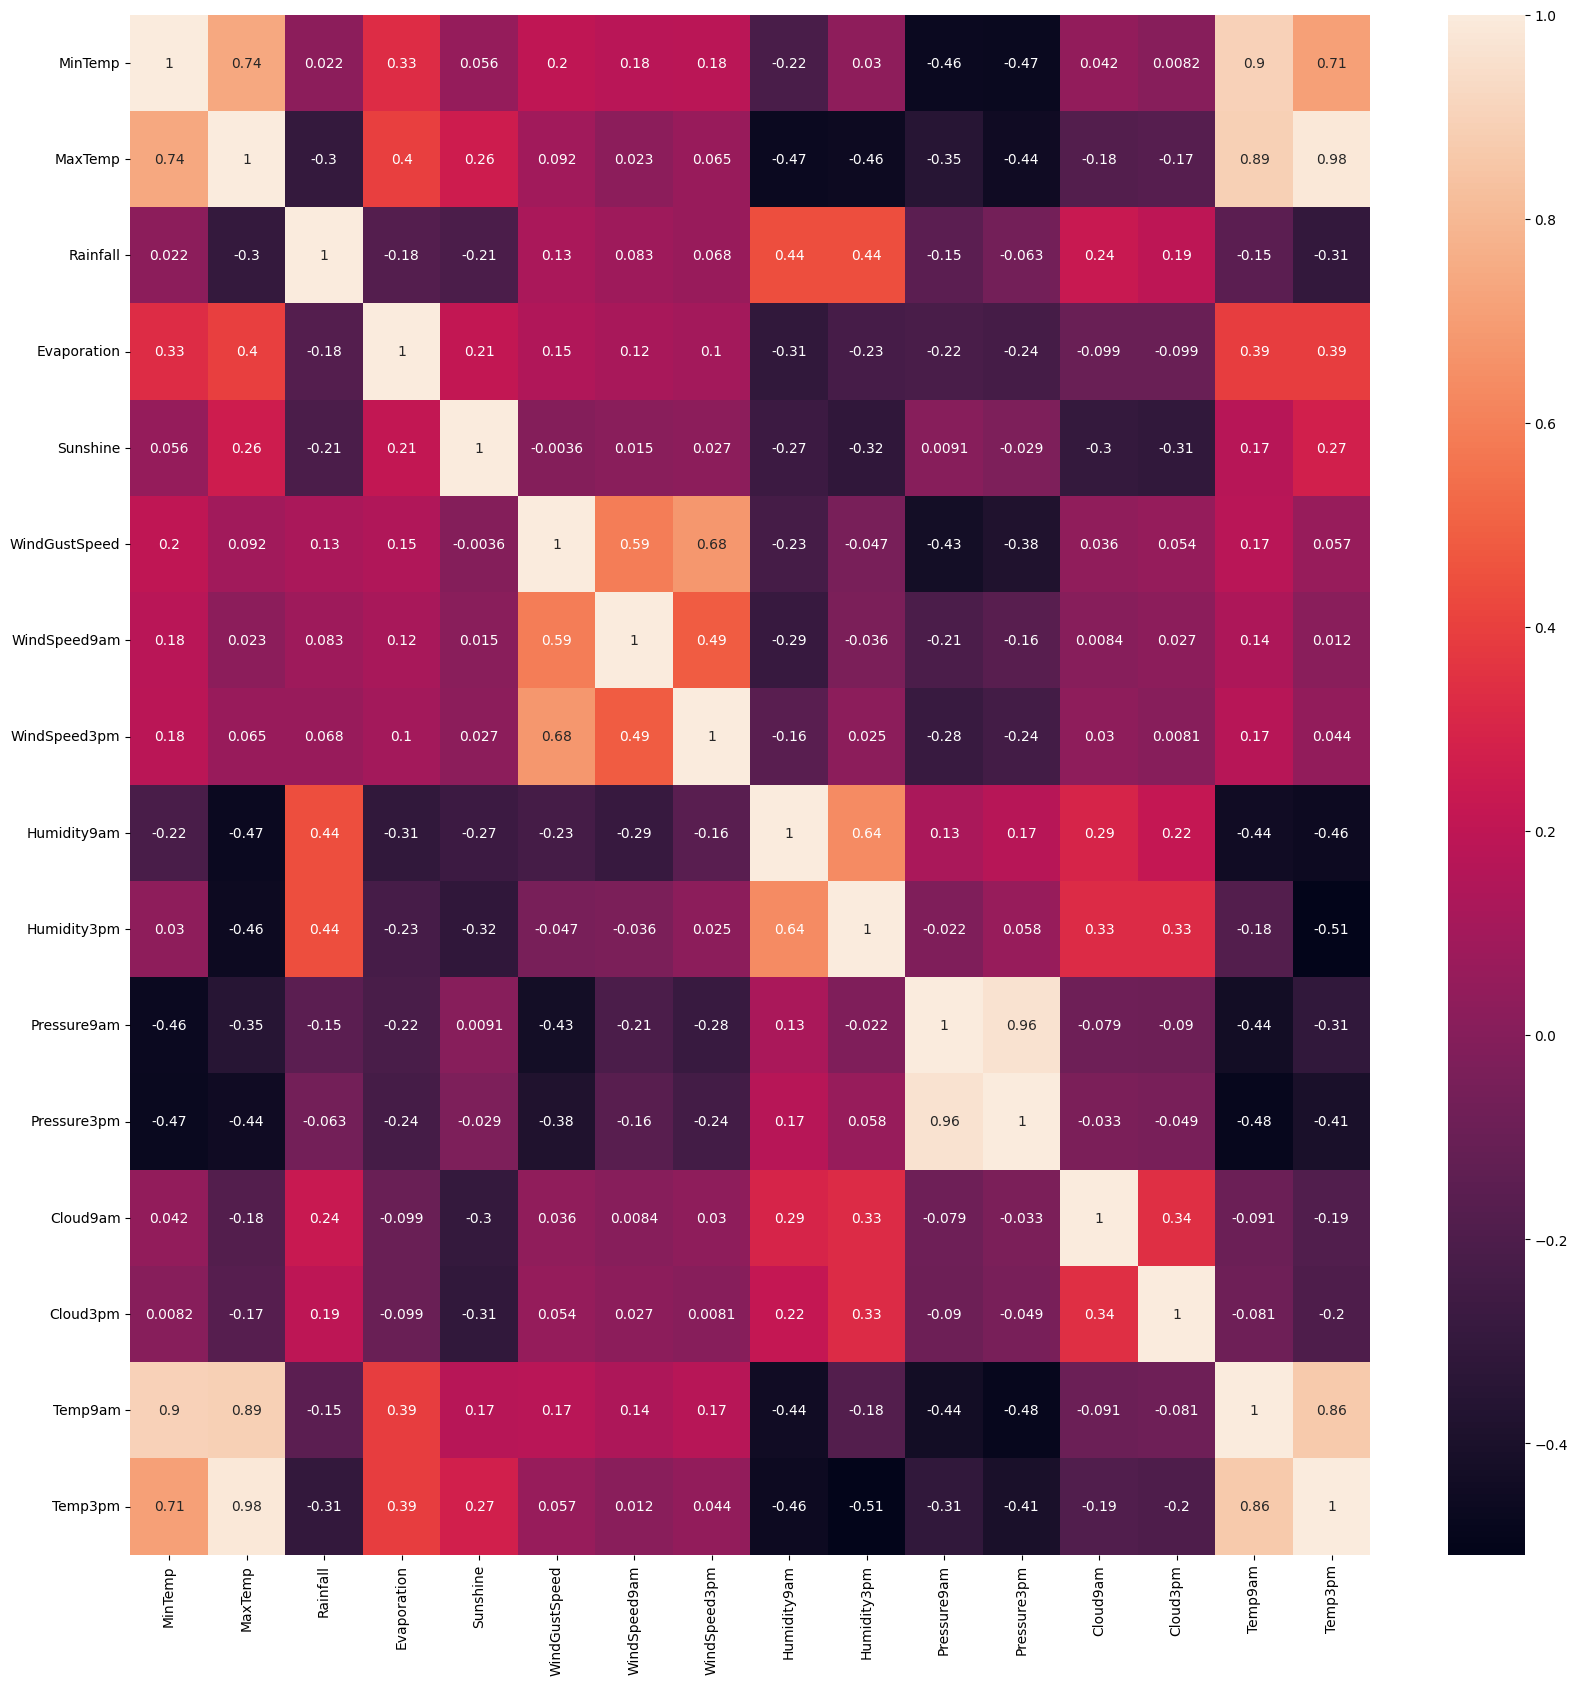

In [11]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

<AxesSubplot:>

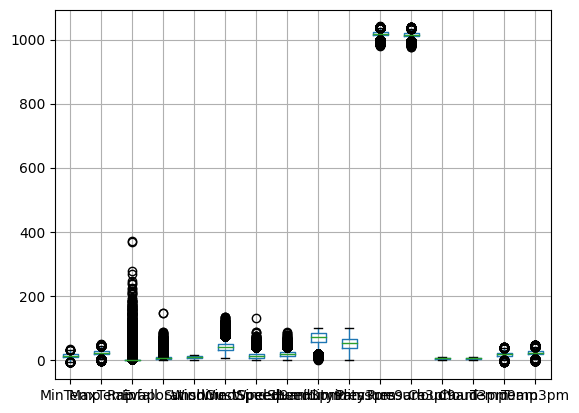

In [12]:
df.boxplot()

In [12]:
for feature in continuous_feature:
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature] = df[feature].fillna(df[feature].median())

In [13]:
df.isnull().sum()*100/len(df)

Date             0.000000
Location         0.000000
MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
Evaporation      0.000000
Sunshine         0.000000
WindGustDir      7.098859
WindGustSpeed    0.000000
WindDir9am       7.263853
WindDir3pm       2.906641
WindSpeed9am     0.000000
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        2.241853
RainTomorrow     2.245978
dtype: float64

In [14]:
discrete_feature

['Cloud9am', 'Cloud3pm']

In [15]:
def mode_nan(df,variable):
    mode=df[variable].value_counts().index[0]
    df[variable].fillna(mode,inplace=True)
mode_nan(df,"Cloud9am")
mode_nan(df,"Cloud3pm")

In [16]:
df["RainToday"] = pd.get_dummies(df["RainToday"], drop_first = True)
df["RainTomorrow"] = pd.get_dummies(df["RainTomorrow"], drop_first = True)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,2.4,8.3,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,3.6,10.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,2.6,4.4,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,18.4,8.9,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.4,3.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,1.4,7.8,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,0,0
145456,2017-06-22,Uluru,3.6,25.3,0.0,7.6,13.5,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,8.0,5.0,10.9,24.5,0,0
145457,2017-06-23,Uluru,5.4,26.9,0.0,6.8,11.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,8.0,1.0,12.5,26.1,0,0
145458,2017-06-24,Uluru,7.8,27.0,0.0,2.6,13.2,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [17]:
for feature in categorical_feature:
    print(feature, (df.groupby([feature])["RainTomorrow"].mean().sort_values(ascending = False)).index)

Date Index(['2007-11-01', '2008-01-19', '2007-12-07', '2007-12-15', '2007-12-16',
       '2007-12-19', '2007-12-20', '2007-12-21', '2007-12-22', '2007-12-24',
       ...
       '2008-05-02', '2008-05-01', '2008-04-30', '2008-04-29', '2008-04-28',
       '2008-04-26', '2008-04-25', '2016-11-26', '2012-04-07', '2008-08-17'],
      dtype='object', name='Date', length=3436)
Location Index(['Portland', 'Walpole', 'Cairns', 'Dartmoor', 'NorfolkIsland',
       'MountGambier', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'MountGinini',
       'NorahHead', 'Darwin', 'Sydney', 'SydneyAirport', 'Ballarat',
       'GoldCoast', 'Watsonia', 'Newcastle', 'Hobart', 'Wollongong',
       'Williamtown', 'Launceston', 'Brisbane', 'MelbourneAirport', 'Adelaide',
       'Sale', 'Albury', 'Perth', 'Melbourne', 'Nuriootpa', 'Penrith',
       'BadgerysCreek', 'PerthAirport', 'Tuggeranong', 'Richmond', 'Bendigo',
       'Canberra', 'WaggaWagga', 'Townsville', 'Katherine', 'PearceRAAF',
       'SalmonGums', 'Nhil', 

In [18]:
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,
       'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}
df["WindGustDir"] = df["WindGustDir"].map(windgustdir)
df["WindDir9am"] = df["WindDir9am"].map(winddir9am)
df["WindDir3pm"] = df["WindDir3pm"].map(winddir3pm)

In [19]:
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].value_counts().index[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].value_counts().index[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].value_counts().index[0])

In [20]:
df.isnull().sum()*100/len(df)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [21]:
encoder = preprocessing.LabelEncoder() 
df['Location']= encoder.fit_transform(df['Location']) 

In [22]:
df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%dT", errors = "coerce")

In [23]:
df["Date_year"] = df["Date"].dt.year
df["Date_month"] = df["Date"].dt.month
df["Date_day"] = df["Date"].dt.day

In [24]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_year,Date_month,Date_day
0,2008-12-01,2,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0,2008,12,1
1,2008-12-02,2,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0,2008,12,2
2,2008-12-03,2,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0,2008,12,3
3,2008-12-04,2,9.2,28.0,0.0,18.4,8.9,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0,2008,12,4
4,2008-12-05,2,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,41,2.8,23.4,0.0,1.4,7.8,15.0,31.0,13.0,13.0,13.0,11.0,51.0,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,0,0,2017,6,21
145456,2017-06-22,41,3.6,25.3,0.0,7.6,13.5,0.0,22.0,13.0,2.0,13.0,9.0,56.0,21.0,1023.5,1019.1,8.0,5.0,10.9,24.5,0,0,2017,6,22
145457,2017-06-23,41,5.4,26.9,0.0,6.8,11.0,3.0,37.0,13.0,3.0,9.0,9.0,53.0,24.0,1021.0,1016.8,8.0,1.0,12.5,26.1,0,0,2017,6,23
145458,2017-06-24,41,7.8,27.0,0.0,2.6,13.2,12.0,28.0,11.0,2.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,2017,6,24


c:\users\admin\anaconda3\envs\rainprediction\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

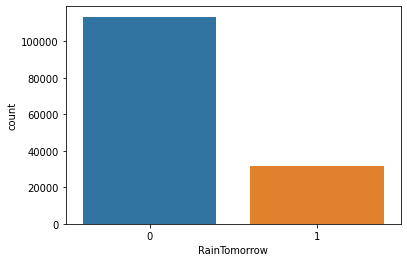

In [26]:
sns.countplot(df["RainTomorrow"])

In [27]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_year,Date_month,Date_day
0,2008-12-01,2,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0,2008,12,1
1,2008-12-02,2,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0,2008,12,2
2,2008-12-03,2,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0,2008,12,3
3,2008-12-04,2,9.2,28.0,0.0,18.4,8.9,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0,2008,12,4
4,2008-12-05,2,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,41,2.8,23.4,0.0,1.4,7.8,15.0,31.0,13.0,13.0,13.0,11.0,51.0,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,0,0,2017,6,21
145456,2017-06-22,41,3.6,25.3,0.0,7.6,13.5,0.0,22.0,13.0,2.0,13.0,9.0,56.0,21.0,1023.5,1019.1,8.0,5.0,10.9,24.5,0,0,2017,6,22
145457,2017-06-23,41,5.4,26.9,0.0,6.8,11.0,3.0,37.0,13.0,3.0,9.0,9.0,53.0,24.0,1021.0,1016.8,8.0,1.0,12.5,26.1,0,0,2017,6,23
145458,2017-06-24,41,7.8,27.0,0.0,2.6,13.2,12.0,28.0,11.0,2.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,2017,6,24


In [32]:
X = df.drop(["RainTomorrow", "Date"], axis=1)
Y = df["RainTomorrow"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)

In [35]:
y_train

43447     0
140904    0
54615     0
109793    0
74462     0
         ..
106567    0
52791     1
56339     0
82299     1
115175    0
Name: RainTomorrow, Length: 116368, dtype: uint8

In [36]:
sm=SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))

The number of classes before fit Counter({0: 90866, 1: 25502})
The number of classes after fit Counter({0: 90866, 1: 90866})


In [37]:
cat = CatBoostClassifier(iterations=2000, eval_metric = "AUC")
cat.fit(X_train_res, y_train_res)

Learning rate set to 0.050311
0:	total: 214ms	remaining: 7m 7s
1:	total: 265ms	remaining: 4m 24s
2:	total: 318ms	remaining: 3m 31s
3:	total: 366ms	remaining: 3m 2s
4:	total: 414ms	remaining: 2m 45s
5:	total: 475ms	remaining: 2m 37s
6:	total: 534ms	remaining: 2m 32s
7:	total: 599ms	remaining: 2m 29s
8:	total: 650ms	remaining: 2m 23s
9:	total: 702ms	remaining: 2m 19s
10:	total: 749ms	remaining: 2m 15s
11:	total: 802ms	remaining: 2m 12s
12:	total: 857ms	remaining: 2m 10s
13:	total: 902ms	remaining: 2m 7s
14:	total: 954ms	remaining: 2m 6s
15:	total: 1.01s	remaining: 2m 4s
16:	total: 1.06s	remaining: 2m 3s
17:	total: 1.11s	remaining: 2m 2s
18:	total: 1.16s	remaining: 2m 1s
19:	total: 1.21s	remaining: 1m 59s
20:	total: 1.27s	remaining: 1m 59s
21:	total: 1.32s	remaining: 1m 58s
22:	total: 1.37s	remaining: 1m 57s
23:	total: 1.42s	remaining: 1m 56s
24:	total: 1.47s	remaining: 1m 55s
25:	total: 1.52s	remaining: 1m 55s
26:	total: 1.57s	remaining: 1m 54s
27:	total: 1.62s	remaining: 1m 54s
28:	tota

235:	total: 12.2s	remaining: 1m 31s
236:	total: 12.2s	remaining: 1m 31s
237:	total: 12.3s	remaining: 1m 31s
238:	total: 12.3s	remaining: 1m 30s
239:	total: 12.4s	remaining: 1m 30s
240:	total: 12.4s	remaining: 1m 30s
241:	total: 12.5s	remaining: 1m 30s
242:	total: 12.6s	remaining: 1m 30s
243:	total: 12.6s	remaining: 1m 30s
244:	total: 12.7s	remaining: 1m 30s
245:	total: 12.7s	remaining: 1m 30s
246:	total: 12.8s	remaining: 1m 30s
247:	total: 12.8s	remaining: 1m 30s
248:	total: 12.9s	remaining: 1m 30s
249:	total: 12.9s	remaining: 1m 30s
250:	total: 13s	remaining: 1m 30s
251:	total: 13s	remaining: 1m 30s
252:	total: 13.1s	remaining: 1m 30s
253:	total: 13.1s	remaining: 1m 30s
254:	total: 13.2s	remaining: 1m 29s
255:	total: 13.2s	remaining: 1m 29s
256:	total: 13.3s	remaining: 1m 29s
257:	total: 13.3s	remaining: 1m 29s
258:	total: 13.4s	remaining: 1m 29s
259:	total: 13.4s	remaining: 1m 29s
260:	total: 13.4s	remaining: 1m 29s
261:	total: 13.5s	remaining: 1m 29s
262:	total: 13.5s	remaining: 1m 

466:	total: 23.8s	remaining: 1m 18s
467:	total: 23.8s	remaining: 1m 18s
468:	total: 23.9s	remaining: 1m 17s
469:	total: 23.9s	remaining: 1m 17s
470:	total: 24s	remaining: 1m 17s
471:	total: 24s	remaining: 1m 17s
472:	total: 24.1s	remaining: 1m 17s
473:	total: 24.1s	remaining: 1m 17s
474:	total: 24.2s	remaining: 1m 17s
475:	total: 24.2s	remaining: 1m 17s
476:	total: 24.3s	remaining: 1m 17s
477:	total: 24.3s	remaining: 1m 17s
478:	total: 24.4s	remaining: 1m 17s
479:	total: 24.4s	remaining: 1m 17s
480:	total: 24.5s	remaining: 1m 17s
481:	total: 24.5s	remaining: 1m 17s
482:	total: 24.6s	remaining: 1m 17s
483:	total: 24.6s	remaining: 1m 17s
484:	total: 24.7s	remaining: 1m 17s
485:	total: 24.7s	remaining: 1m 17s
486:	total: 24.8s	remaining: 1m 17s
487:	total: 24.8s	remaining: 1m 16s
488:	total: 24.9s	remaining: 1m 16s
489:	total: 24.9s	remaining: 1m 16s
490:	total: 25s	remaining: 1m 16s
491:	total: 25s	remaining: 1m 16s
492:	total: 25.1s	remaining: 1m 16s
493:	total: 25.1s	remaining: 1m 16s


698:	total: 36.1s	remaining: 1m 7s
699:	total: 36.2s	remaining: 1m 7s
700:	total: 36.2s	remaining: 1m 7s
701:	total: 36.3s	remaining: 1m 7s
702:	total: 36.3s	remaining: 1m 7s
703:	total: 36.4s	remaining: 1m 7s
704:	total: 36.5s	remaining: 1m 6s
705:	total: 36.5s	remaining: 1m 6s
706:	total: 36.6s	remaining: 1m 6s
707:	total: 36.6s	remaining: 1m 6s
708:	total: 36.7s	remaining: 1m 6s
709:	total: 36.7s	remaining: 1m 6s
710:	total: 36.8s	remaining: 1m 6s
711:	total: 36.8s	remaining: 1m 6s
712:	total: 36.9s	remaining: 1m 6s
713:	total: 36.9s	remaining: 1m 6s
714:	total: 37s	remaining: 1m 6s
715:	total: 37s	remaining: 1m 6s
716:	total: 37.1s	remaining: 1m 6s
717:	total: 37.1s	remaining: 1m 6s
718:	total: 37.2s	remaining: 1m 6s
719:	total: 37.2s	remaining: 1m 6s
720:	total: 37.3s	remaining: 1m 6s
721:	total: 37.3s	remaining: 1m 6s
722:	total: 37.4s	remaining: 1m 6s
723:	total: 37.4s	remaining: 1m 5s
724:	total: 37.5s	remaining: 1m 5s
725:	total: 37.5s	remaining: 1m 5s
726:	total: 37.6s	remain

938:	total: 48.7s	remaining: 55s
939:	total: 48.8s	remaining: 55s
940:	total: 48.8s	remaining: 54.9s
941:	total: 48.9s	remaining: 54.9s
942:	total: 48.9s	remaining: 54.8s
943:	total: 49s	remaining: 54.8s
944:	total: 49s	remaining: 54.7s
945:	total: 49.1s	remaining: 54.7s
946:	total: 49.1s	remaining: 54.6s
947:	total: 49.2s	remaining: 54.6s
948:	total: 49.2s	remaining: 54.5s
949:	total: 49.3s	remaining: 54.4s
950:	total: 49.3s	remaining: 54.4s
951:	total: 49.4s	remaining: 54.3s
952:	total: 49.4s	remaining: 54.3s
953:	total: 49.4s	remaining: 54.2s
954:	total: 49.5s	remaining: 54.2s
955:	total: 49.5s	remaining: 54.1s
956:	total: 49.6s	remaining: 54.1s
957:	total: 49.6s	remaining: 54s
958:	total: 49.7s	remaining: 53.9s
959:	total: 49.8s	remaining: 53.9s
960:	total: 49.8s	remaining: 53.9s
961:	total: 49.9s	remaining: 53.9s
962:	total: 50s	remaining: 53.8s
963:	total: 50.1s	remaining: 53.8s
964:	total: 50.1s	remaining: 53.8s
965:	total: 50.2s	remaining: 53.7s
966:	total: 50.3s	remaining: 53.

1175:	total: 1m 1s	remaining: 42.8s
1176:	total: 1m 1s	remaining: 42.7s
1177:	total: 1m 1s	remaining: 42.7s
1178:	total: 1m 1s	remaining: 42.6s
1179:	total: 1m 1s	remaining: 42.6s
1180:	total: 1m 1s	remaining: 42.5s
1181:	total: 1m 1s	remaining: 42.4s
1182:	total: 1m 1s	remaining: 42.4s
1183:	total: 1m 1s	remaining: 42.3s
1184:	total: 1m 1s	remaining: 42.3s
1185:	total: 1m 1s	remaining: 42.2s
1186:	total: 1m 1s	remaining: 42.2s
1187:	total: 1m 1s	remaining: 42.1s
1188:	total: 1m 1s	remaining: 42.1s
1189:	total: 1m 1s	remaining: 42s
1190:	total: 1m 1s	remaining: 42s
1191:	total: 1m 1s	remaining: 41.9s
1192:	total: 1m 1s	remaining: 41.8s
1193:	total: 1m 1s	remaining: 41.8s
1194:	total: 1m 1s	remaining: 41.7s
1195:	total: 1m 2s	remaining: 41.7s
1196:	total: 1m 2s	remaining: 41.6s
1197:	total: 1m 2s	remaining: 41.6s
1198:	total: 1m 2s	remaining: 41.5s
1199:	total: 1m 2s	remaining: 41.5s
1200:	total: 1m 2s	remaining: 41.4s
1201:	total: 1m 2s	remaining: 41.4s
1202:	total: 1m 2s	remaining: 41

1404:	total: 1m 13s	remaining: 31.1s
1405:	total: 1m 13s	remaining: 31s
1406:	total: 1m 13s	remaining: 31s
1407:	total: 1m 13s	remaining: 30.9s
1408:	total: 1m 13s	remaining: 30.8s
1409:	total: 1m 13s	remaining: 30.8s
1410:	total: 1m 13s	remaining: 30.7s
1411:	total: 1m 13s	remaining: 30.7s
1412:	total: 1m 13s	remaining: 30.6s
1413:	total: 1m 13s	remaining: 30.6s
1414:	total: 1m 13s	remaining: 30.5s
1415:	total: 1m 13s	remaining: 30.5s
1416:	total: 1m 14s	remaining: 30.5s
1417:	total: 1m 14s	remaining: 30.4s
1418:	total: 1m 14s	remaining: 30.4s
1419:	total: 1m 14s	remaining: 30.3s
1420:	total: 1m 14s	remaining: 30.3s
1421:	total: 1m 14s	remaining: 30.2s
1422:	total: 1m 14s	remaining: 30.2s
1423:	total: 1m 14s	remaining: 30.1s
1424:	total: 1m 14s	remaining: 30.1s
1425:	total: 1m 14s	remaining: 30s
1426:	total: 1m 14s	remaining: 29.9s
1427:	total: 1m 14s	remaining: 29.9s
1428:	total: 1m 14s	remaining: 29.8s
1429:	total: 1m 14s	remaining: 29.8s
1430:	total: 1m 14s	remaining: 29.7s
1431:	t

1628:	total: 1m 25s	remaining: 19.4s
1629:	total: 1m 25s	remaining: 19.4s
1630:	total: 1m 25s	remaining: 19.3s
1631:	total: 1m 25s	remaining: 19.3s
1632:	total: 1m 25s	remaining: 19.2s
1633:	total: 1m 25s	remaining: 19.2s
1634:	total: 1m 25s	remaining: 19.1s
1635:	total: 1m 25s	remaining: 19.1s
1636:	total: 1m 25s	remaining: 19s
1637:	total: 1m 25s	remaining: 18.9s
1638:	total: 1m 25s	remaining: 18.9s
1639:	total: 1m 25s	remaining: 18.8s
1640:	total: 1m 25s	remaining: 18.8s
1641:	total: 1m 25s	remaining: 18.7s
1642:	total: 1m 26s	remaining: 18.7s
1643:	total: 1m 26s	remaining: 18.6s
1644:	total: 1m 26s	remaining: 18.6s
1645:	total: 1m 26s	remaining: 18.5s
1646:	total: 1m 26s	remaining: 18.5s
1647:	total: 1m 26s	remaining: 18.4s
1648:	total: 1m 26s	remaining: 18.4s
1649:	total: 1m 26s	remaining: 18.3s
1650:	total: 1m 26s	remaining: 18.3s
1651:	total: 1m 26s	remaining: 18.2s
1652:	total: 1m 26s	remaining: 18.2s
1653:	total: 1m 26s	remaining: 18.1s
1654:	total: 1m 26s	remaining: 18.1s
165

1854:	total: 1m 37s	remaining: 7.62s
1855:	total: 1m 37s	remaining: 7.57s
1856:	total: 1m 37s	remaining: 7.52s
1857:	total: 1m 37s	remaining: 7.47s
1858:	total: 1m 37s	remaining: 7.42s
1859:	total: 1m 37s	remaining: 7.36s
1860:	total: 1m 37s	remaining: 7.31s
1861:	total: 1m 37s	remaining: 7.26s
1862:	total: 1m 37s	remaining: 7.2s
1863:	total: 1m 38s	remaining: 7.15s
1864:	total: 1m 38s	remaining: 7.1s
1865:	total: 1m 38s	remaining: 7.05s
1866:	total: 1m 38s	remaining: 7s
1867:	total: 1m 38s	remaining: 6.94s
1868:	total: 1m 38s	remaining: 6.89s
1869:	total: 1m 38s	remaining: 6.84s
1870:	total: 1m 38s	remaining: 6.79s
1871:	total: 1m 38s	remaining: 6.73s
1872:	total: 1m 38s	remaining: 6.68s
1873:	total: 1m 38s	remaining: 6.63s
1874:	total: 1m 38s	remaining: 6.58s
1875:	total: 1m 38s	remaining: 6.52s
1876:	total: 1m 38s	remaining: 6.47s
1877:	total: 1m 38s	remaining: 6.42s
1878:	total: 1m 38s	remaining: 6.37s
1879:	total: 1m 38s	remaining: 6.31s
1880:	total: 1m 38s	remaining: 6.26s
1881:	

In [38]:
y_pred = cat.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[21520  1197]
 [ 2815  3560]]
0.8620926715248178
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     22717
           1       0.75      0.56      0.64      6375

    accuracy                           0.86     29092
   macro avg       0.82      0.75      0.78     29092
weighted avg       0.85      0.86      0.85     29092



0.7528697779239354

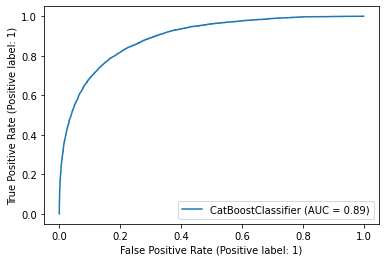

In [39]:
metrics.plot_roc_curve(cat, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None) 

In [41]:
rf=RandomForestClassifier()
rf.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [42]:
y_pred1 = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[20614  2103]
 [ 2441  3934]]
0.843805857280352
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     22717
           1       0.65      0.62      0.63      6375

    accuracy                           0.84     29092
   macro avg       0.77      0.76      0.77     29092
weighted avg       0.84      0.84      0.84     29092



0.7622620979192398

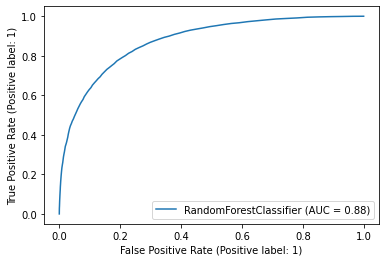

In [43]:
metrics.plot_roc_curve(rf, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred1, average=None) 

In [44]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)

LogisticRegression()

In [45]:
y_pred2 = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[17788  4929]
 [ 1521  4854]]
0.7782895641413446
              precision    recall  f1-score   support

           0       0.92      0.78      0.85     22717
           1       0.50      0.76      0.60      6375

    accuracy                           0.78     29092
   macro avg       0.71      0.77      0.72     29092
weighted avg       0.83      0.78      0.79     29092



0.7722188462126058

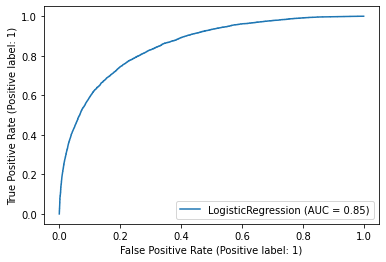

In [46]:
metrics.plot_roc_curve(logreg, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred2, average=None) 

In [47]:
gnb = GaussianNB()
gnb.fit(X_train_res, y_train_res)

GaussianNB()

In [48]:
y_pred3 = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[18235  4482]
 [ 2011  4364]]
0.7768114945689537
              precision    recall  f1-score   support

           0       0.90      0.80      0.85     22717
           1       0.49      0.68      0.57      6375

    accuracy                           0.78     29092
   macro avg       0.70      0.74      0.71     29092
weighted avg       0.81      0.78      0.79     29092



0.7436259206416201

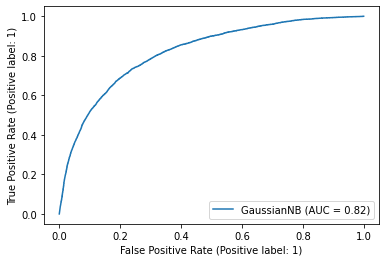

In [49]:
metrics.plot_roc_curve(gnb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred3, average=None) 

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train_res, y_train_res)

In [ ]:
y_pred6 = xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred6))
print(accuracy_score(y_test,y_pred6))
print(classification_report(y_test,y_pred6))

In [ ]:
metrics.plot_roc_curve(xgb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred6, average=None) 

In [ ]:
joblib.dump(rf, "rf.pkl")
joblib.dump(cat, "cat.pkl")
joblib.dump(logreg, "logreg.pkl")
joblib.dump(gnb, "gnb.pkl")
joblib.dump(xgb, "xgb.pkl")